In [209]:
#pip install seaborn


In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [211]:
# Step 1: Read the dataset and basic dataframe exploration
df = pd.read_csv('laptops_data.csv')

In [212]:
df.head()

,index,Model,Price,Rating,processor_brand,ram_memory,primary_storage_type,primary_storage_capacity,display_size,OS,year_of_warranty
0,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,8,SSD,512,15.6,windows,1
1,2,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,16,SSD,1024,15.6,windows,1
2,3,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,8,SSD,512,15.6,windows,1
3,4,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,8,SSD,512,14.0,windows,1
4,5,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,8,SSD,512,15.6,windows,1


In [213]:
df.tail()

,index,Model,Price,Rating,processor_brand,ram_memory,primary_storage_type,primary_storage_capacity,display_size,OS,year_of_warranty
986,998,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,16,SSD,512,15.6,ubuntu,1
987,999,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,16,SSD,512,15.6,ubuntu,2
988,1000,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,8,SSD,512,15.6,ubuntu,1
989,1001,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,16,SSD,512,14.0,ubuntu,1
990,1002,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,20990,37,intel,4,HDD,128,15.6,ubuntu,1


In [214]:
df.shape

(991, 11)

In [215]:
df.dtypes

index                         int64
Model                        object
Price                         int64
Rating                        int64
processor_brand              object
ram_memory                    int64
primary_storage_type         object
primary_storage_capacity      int64
display_size                float64
OS                           object
year_of_warranty             object
dtype: object

In [216]:
# some columns require encoding as they are categorical

In [217]:
print(df.columns)

Index(['index', 'Model', 'Price', 'Rating', 'processor_brand', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity', 'display_size',
       'OS', 'year_of_warranty'],
      dtype='object')


In [218]:
# Step 2: Summary statistics of numeric columns

In [219]:
print("\nStep 2: Summary Statistics of Numeric Columns")
df.describe()


Step 2: Summary Statistics of Numeric Columns


,index,Price,Rating,ram_memory,primary_storage_capacity,display_size
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,13.047427,610.938446,15.171241
std,287.899458,57384.910269,10.190575,5.591188,266.927666,0.938089
min,1.000000,9800.000000,24.000000,2.000000,32.000000,10.100000
25%,258.500000,43595.000000,58.000000,8.000000,512.000000,14.000000
50%,507.000000,61900.000000,64.000000,16.000000,512.000000,15.600000
75%,754.500000,89245.000000,71.000000,16.000000,512.000000,15.600000
max,1002.000000,454490.000000,89.000000,36.000000,2048.000000,18.000000


In [220]:
# include one for each column:
df.processor_brand.value_counts()

processor_brand
intel    390
amd      353
apple    162
other     86
Name: count, dtype: int64

In [221]:
df.primary_storage_type.value_counts()

primary_storage_type
SSD    531
HDD    460
Name: count, dtype: int64

In [222]:
df.OS.value_counts()

OS
andriod    198
dos        168
windows    158
chrome     147
mac        144
ubuntu      91
other       85
Name: count, dtype: int64

Step 4: Data Visualization

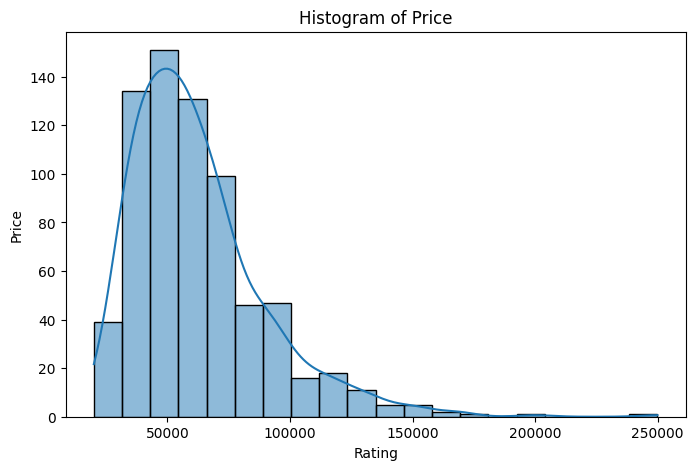

In [257]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

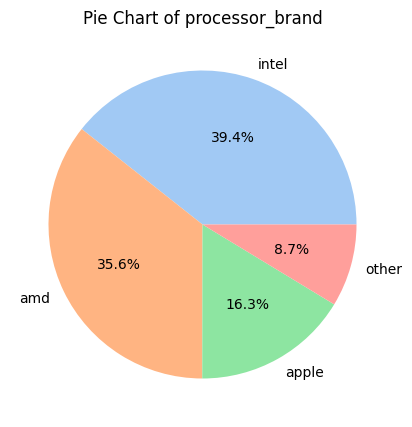

In [224]:
plt.figure(figsize=(8, 5))
df['processor_brand'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of processor_brand')
plt.ylabel('')
plt.show()

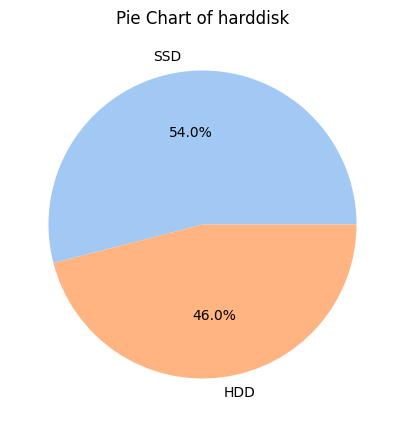

In [256]:
plt.figure(figsize=(8, 5))
df['primary_storage_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of harddisk')
plt.ylabel('')
plt.show()

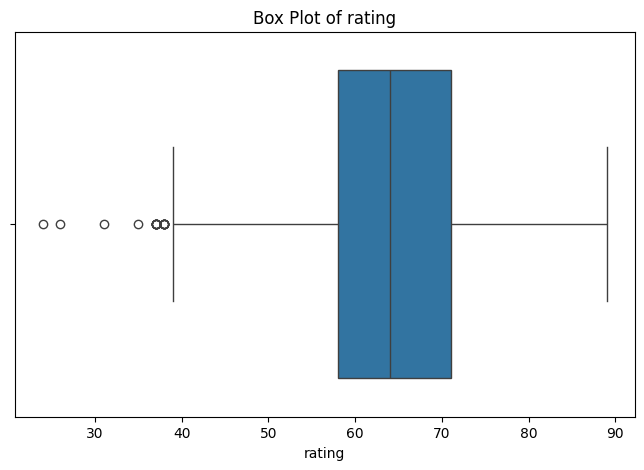

In [226]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of rating')
plt.xlabel('rating')
plt.show()

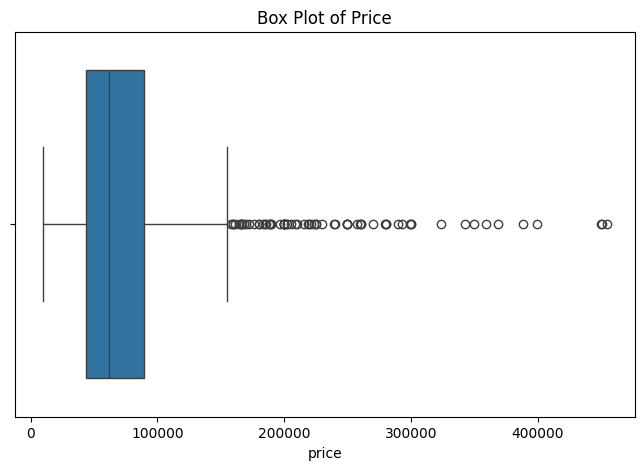

In [227]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('price')
plt.show()

<Axes: xlabel='Rating', ylabel='Price'>

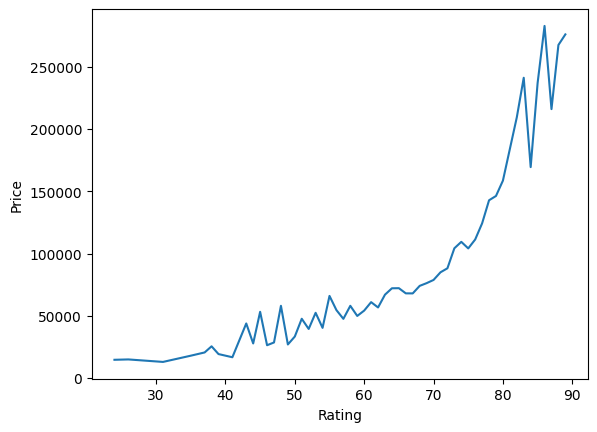

In [228]:
# Bivariate Line Plot
sns.lineplot(x='Rating', y='Price', data=df, errorbar=None)

<Axes: xlabel='display_size', ylabel='Price'>

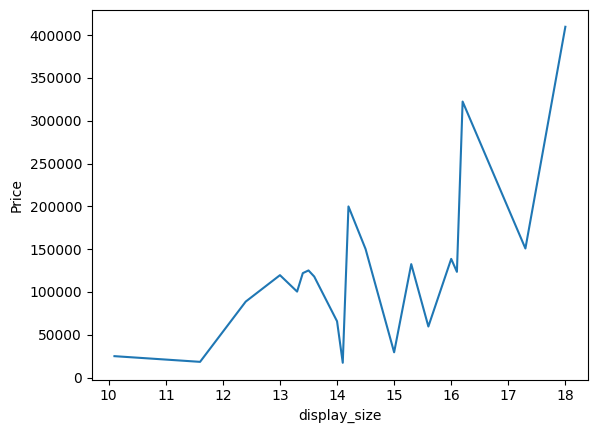

In [229]:
# Bivariate Line Plot
sns.lineplot(x='display_size', y='Price', data=df, errorbar=None)

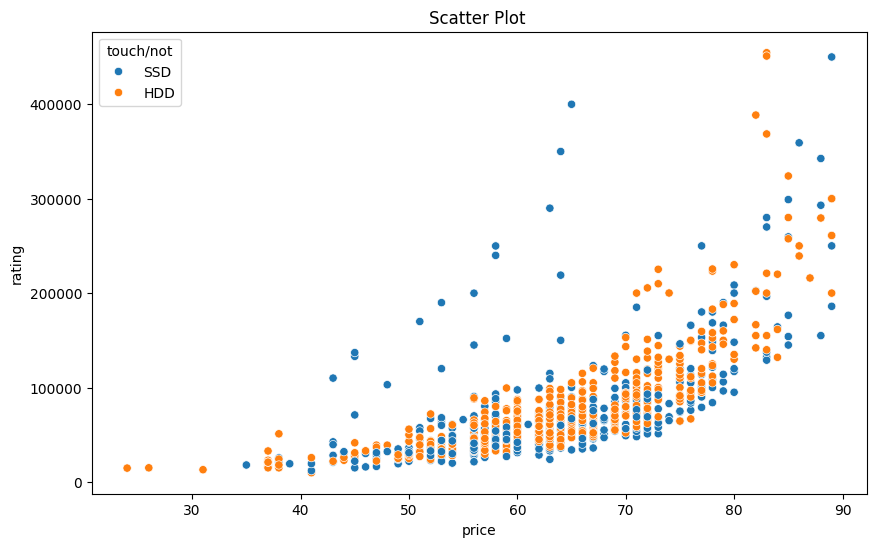

In [230]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', hue='primary_storage_type', data=df)
plt.title('Scatter Plot ')
plt.xlabel('price')
plt.ylabel('rating')
plt.legend(title='touch/not')
plt.show()

In [231]:
df.dtypes

index                         int64
Model                        object
Price                         int64
Rating                        int64
processor_brand              object
ram_memory                    int64
primary_storage_type         object
primary_storage_capacity      int64
display_size                float64
OS                           object
year_of_warranty             object
dtype: object

Data preprocessing

In [232]:
# Step 1: Remove ID columns - index and identity related
df = df.drop(columns=['index', 'Model'])

In [233]:
df.dtypes

Price                         int64
Rating                        int64
processor_brand              object
ram_memory                    int64
primary_storage_type         object
primary_storage_capacity      int64
display_size                float64
OS                           object
year_of_warranty             object
dtype: object

In [234]:
df.shape

(991, 9)

In [235]:
df = df.dropna()

In [236]:
df.shape

(991, 9)

In [237]:
# Step 3: Split numeric columns into X
X = df.drop('Price', axis=1)
X_num = X.select_dtypes(include=['int64', 'float64'])

In [238]:
X_num.dtypes

Rating                        int64
ram_memory                    int64
primary_storage_capacity      int64
display_size                float64
dtype: object

In [239]:


Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
#print(lower_bound)
#print(X_num)
upper_bound = Q3 + 1.5 * IQR
outlier_filter = ~((X_num < lower_bound) | (X_num > upper_bound)).any(axis=1)
df = df[outlier_filter]
print(df.shape)
Y = df['Price']
print(Y.shape)
X = df.drop('Price', axis=1)
X_num = X.select_dtypes(include=['int64', 'float64'])
print(X_num.shape)
X_cat = df.select_dtypes(include=['object'])
print(X_cat.shape)

(707, 9)
(707,)
(707, 4)
(707, 4)


In [240]:
print(X_num)
print("=====================")
print(X_cat)

     Rating  ram_memory  primary_storage_capacity  display_size
0        63           8                       512          15.6
2        73           8                       512          15.6
3        62           8                       512          14.0
4        62           8                       512          15.6
6        56          16                       512          15.6
..      ...         ...                       ...           ...
985      67           8                       512          15.6
986      68          16                       512          15.6
987      73          16                       512          15.6
988      59           8                       512          15.6
989      68          16                       512          14.0

[707 rows x 4 columns]
    processor_brand primary_storage_type       OS year_of_warranty
0             intel                  SSD  windows                1
2               amd                  SSD  windows                1
3      

In [241]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)
print(X_num_scaled.shape)

(707, 4)


In [242]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity
print(X_cat_encoded.shape)

(707, 17)


In [243]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
print(X.shape)
print(Y.shape)



(707, 21)
(707,)


In [244]:

print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(Y.isnull().sum())
print(X.shape)
print(Y.shape)


Step 7: Checking for NAs and Shape Compatibility
Rating                             0
ram_memory                         0
primary_storage_capacity           0
display_size                       0
processor_brand_amd                0
processor_brand_apple              0
processor_brand_intel              0
processor_brand_other              0
primary_storage_type_HDD           0
primary_storage_type_SSD           0
OS_andriod                         0
OS_chrome                          0
OS_dos                             0
OS_mac                             0
OS_other                           0
OS_ubuntu                          0
OS_windows                         0
year_of_warranty_1                 0
year_of_warranty_2                 0
year_of_warranty_3                 0
year_of_warranty_No information    0
dtype: int64
0
(707, 21)
(707,)


In [245]:
X.describe()

,Rating,ram_memory,primary_storage_capacity,display_size,processor_brand_amd,processor_brand_apple,processor_brand_intel,processor_brand_other,primary_storage_type_HDD,primary_storage_type_SSD,...,OS_chrome,OS_dos,OS_mac,OS_other,OS_ubuntu,OS_windows,year_of_warranty_1,year_of_warranty_2,year_of_warranty_3,year_of_warranty_No information
count,707.000000,707.000000,707.0,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.497595,0.519802,0.0,0.509062,0.369165,0.151344,0.384724,0.094767,0.459689,0.540311,...,0.130127,0.171146,0.148515,0.093352,0.091938,0.162659,0.929279,0.056577,0.009901,0.004243
std,0.183392,0.498898,0.0,0.188768,0.482920,0.358637,0.486874,0.293100,0.498725,0.498725,...,0.336682,0.376903,0.355861,0.291131,0.289143,0.369316,0.256540,0.231196,0.099080,0.065048
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.0,0.232558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.0,0.604651,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.650000,1.000000,0.0,0.604651,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(600, 21)
(107, 21)
(600,)
(107,)


In [247]:
# Step 9: Observations after preprocessing
# - ID columns have been removed.
# - Rows with missing values have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled (if required, this step is optional based on the algorithm used).
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

ready to implement model

In [248]:
X.to_csv('Laptop_features.csv', index=False)
Y.to_csv('laptop_label_price.csv',index=False)

In [249]:
# We had saved the feature and label as CSV files. read them back in.
# make these CSV files available in the same folder as this notebook.
# Read the CSV files back into X and y
X = pd.read_csv('Laptop_features.csv')
y = pd.read_csv('laptop_label_price.csv')

In [250]:
X.shape, y.shape

((707, 21), (707, 1))

In [251]:
Y

0      23990
2      51100
3      39990
4      28580
6      34990
       ...  
985    75500
986    65990
987    91990
988    44990
989    67990
Name: Price, Length: 707, dtype: int64

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
# arbitrarily select a k to try out the code before we use the same code to get the best k
k = 5

In [254]:
# Define a list of K values to try out
k_values = [3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store evaluation metrics for each K value
train_r_squared = []
train_mape = []
test_mape = []

# Step 2: Loop through different K values and fit KNN regression models
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    
    # Step 3: Make predictions on both train and test sets
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)



    # Step 4: Calculate evaluation metrics for each K value
    train_r_squared.append(r2_score(y_train, y_train_pred))
    train_mape.append(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100)
    test_mape.append(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100)

# Create a DataFrame to store the results
evaluation_df = pd.DataFrame({
    'K': k_values,
    'Train R-squared': train_r_squared,
    'Train MAPE': train_mape,
    'Test MAPE': test_mape
})

# Display the evaluation metrics for different K values
print(evaluation_df)

    K  Train R-squared  Train MAPE  Test MAPE
0   3         0.693122   16.476437  25.792670
1   5         0.581746   19.083289  22.730162
2   7         0.513856   21.173003  22.111737
3   9         0.446635   23.080980  23.012583
4  11         0.409589   23.777429  23.271898
5  13         0.358773   25.291358  24.289339
6  15         0.340935   25.854144  24.894761
